In [1]:
import requests, json
!networksetup -setairportnetwork en0 DIRECT-4GE1:ILCE-7RM3

In [2]:
class A7R3:
    def __init__(self, base_url='http://192.168.122.1:10000/sony/camera'):
        self.base_url = base_url
        self.f_list, self.iso_list, self.s_list = self['fNumberCandidates',
                                                       'isoSpeedRateCandidates',
                                                       'shutterSpeedCandidates']

    def post(self, method, params=[], req_id=1, version='1.0'):
        payload = {
            'method': method,
            'params': params,
            'id': req_id,
            'version': version
        }

        r = requests.post(self.base_url, json=payload).content

        return json.loads(r)['error'] if ('error' in json.loads(r).keys()) else json.loads(r)['result']
    
    def get_event(self):
        return self.post('getEvent', [False], version='1.3')
    
    def __getitem__(self, items):
        d = {'cameraStatus': 1,
             'currentShootMode': 21,
             'currentFNumber': 27,
             'fNumberCandidates': 27,
             'currentIsoSpeedRate': 29,
             'isoSpeedRateCandidates': 29,
             'currentShutterSpeed': 32,
             'shutterSpeedCandidates': 32,
             'focusStatus': 35}
        current_event = self.get_event()
        if type(items) == str:
            return current_event[d[items]][items] 
        else:
            return [current_event[d[_]][_] for _ in items]
            
    
    def still(self, s=None, f=None, iso=None):
        try:
            assert(self['currentShootMode'] == 'still')
            assert(self['cameraStatus'] == 'IDLE')
            if s is not None:
                if s in self.s_list:
                    self.post('setShutterSpeed', [s])
                else:
                    raise Exception('Unsupported Shutterspeed')
            if f is not None:
                if f in self.f_list:
                    self.post('setFNumber', [f])
                else:
                    raise Exception('Unsupported F Number')
            if iso is not None:
                if iso in self.iso_list:
                    self.post('setIsoSpeedRate', [iso])
                else:
                    raise Exception('Unsupported ISO')
            

            s, f, iso = self['currentShutterSpeed', 'currentFNumber', 'currentIsoSpeedRate']
            print(f'Camera Status: <Shutterspeed: {s}, F: {f}, ISO: {iso}>')
            
            self.post('actHalfPressShutter')
            while True:
                focus_status = self['focusStatus']
                print(focus_status)
                if focus_status != 'Not Focusing' and focus_status != 'Focusing':
                    break
            return self.post('actTakePicture')[0][0]
        except:
            raise
        finally:
            self.post('cancelHalfPressShutter')

    def start_movie(self):
        assert(self['currentShootMode'] == 'movie')
        assert(self['cameraStatus'] == 'IDLE')
        return self.post('startMovieRec')
    
    def stop_movie(self):
        assert(self['currentShootMode'] == 'movie')
        assert(self['cameraStatus'] == 'MovieRecording')
        return self.post('stopMovieRec')

SLR = A7R3()

In [3]:
display(SLR.post('getAvailableApiList'))
display(SLR.f_list)
display(SLR.iso_list)
display(SLR.s_list)

[['getAvailableApiList',
  'getShootMode',
  'getSupportedShootMode',
  'getAvailableShootMode',
  'setFlashMode',
  'getFlashMode',
  'getSupportedFlashMode',
  'getAvailableFlashMode',
  'setSelfTimer',
  'getSelfTimer',
  'getSupportedSelfTimer',
  'getAvailableSelfTimer',
  'getSupportedMovieQuality',
  'startLiveview',
  'stopLiveview',
  'actTakePicture',
  'startMovieRec',
  'stopMovieRec',
  'awaitTakePicture',
  'getExposureMode',
  'getSupportedExposureMode',
  'getAvailableExposureMode',
  'getSupportedFocusMode',
  'getSupportedExposureCompensation',
  'setFNumber',
  'getFNumber',
  'getSupportedFNumber',
  'getAvailableFNumber',
  'setWhiteBalance',
  'getWhiteBalance',
  'getSupportedWhiteBalance',
  'getAvailableWhiteBalance',
  'setShutterSpeed',
  'getShutterSpeed',
  'getSupportedShutterSpeed',
  'getAvailableShutterSpeed',
  'setIsoSpeedRate',
  'getIsoSpeedRate',
  'getSupportedIsoSpeedRate',
  'getAvailableIsoSpeedRate',
  'actHalfPressShutter',
  'cancelHalfPress

['1.4',
 '1.6',
 '1.8',
 '2.0',
 '2.2',
 '2.5',
 '2.8',
 '3.2',
 '3.5',
 '4.0',
 '4.5',
 '5.0',
 '5.6',
 '6.3',
 '7.1',
 '8.0',
 '9.0',
 '10',
 '11',
 '13',
 '14',
 '16']

['AUTO',
 '50',
 '64',
 '80',
 '100',
 '125',
 '160',
 '200',
 '250',
 '320',
 '400',
 '500',
 '640',
 '800',
 '1000',
 '1250',
 '1600',
 '2000',
 '2500',
 '3200',
 '4000',
 '5000',
 '6400',
 '8000',
 '10000',
 '12800',
 '16000',
 '20000',
 '25600',
 '32000',
 '40000',
 '51200',
 '64000',
 '80000',
 '102400']

['BULB',
 '30"',
 '25"',
 '20"',
 '15"',
 '13"',
 '10"',
 '8"',
 '6"',
 '5"',
 '4"',
 '3.2"',
 '2.5"',
 '2"',
 '1.6"',
 '1.3"',
 '1"',
 '0.8"',
 '0.6"',
 '0.5"',
 '0.4"',
 '1/3',
 '1/4',
 '1/5',
 '1/6',
 '1/8',
 '1/10',
 '1/13',
 '1/15',
 '1/20',
 '1/25',
 '1/30',
 '1/40',
 '1/50',
 '1/60',
 '1/80',
 '1/100',
 '1/125',
 '1/160',
 '1/200',
 '1/250',
 '1/320',
 '1/400',
 '1/500',
 '1/640',
 '1/800',
 '1/1000',
 '1/1250',
 '1/1600',
 '1/2000',
 '1/2500',
 '1/3200',
 '1/4000',
 '1/5000',
 '1/6400',
 '1/8000']

Camera Status: <Shutterspeed: 1/100, F: 1.4, ISO: 2000>
Not Focusing
Not Focusing
Not Focusing
Not Focusing
Focused With Following Subject Movement


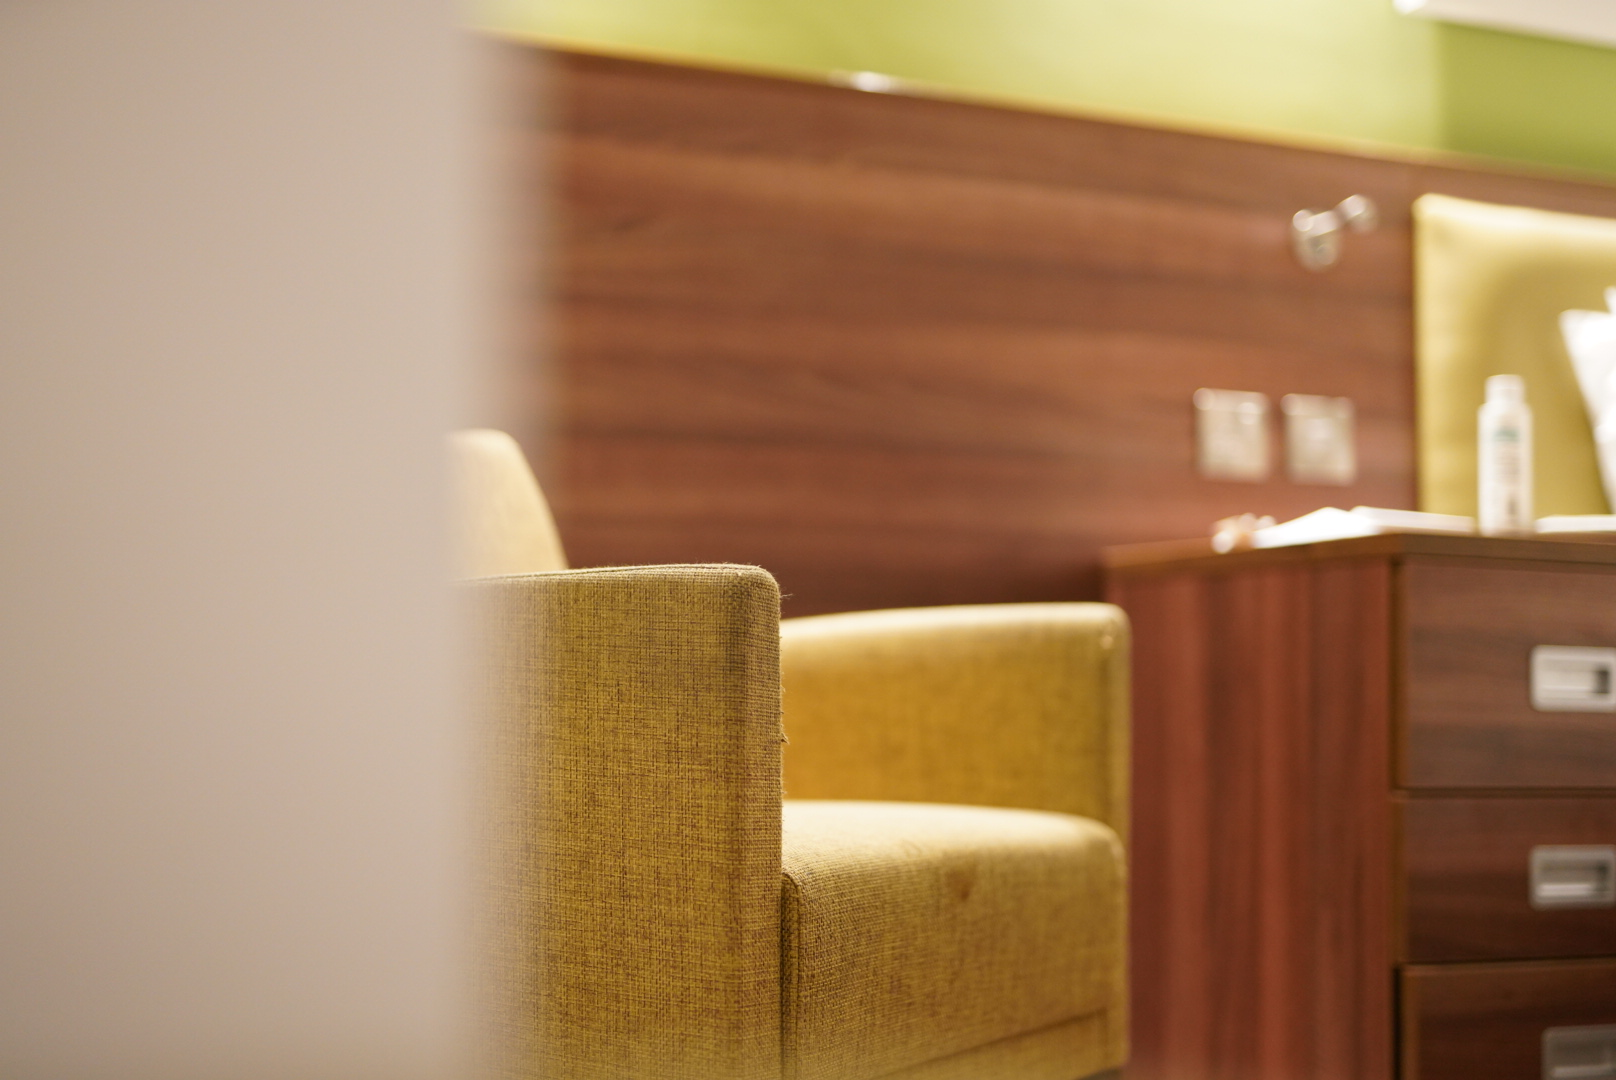

In [4]:
from IPython.display import Image
import time

if SLR['currentShootMode'] == 'still':
    image_url = SLR.still(s='1/100', f='1.4', iso='2000')
    display(Image(requests.get(image_url).content, width=600))
else:
    SLR.start_movie()
    time.sleep(0.5)
    SLR.stop_movie()